# Fuzzy Kmeans 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
## Configuration of Kmeans 
Dimensionalty = 2 
k_cluster = 4
N_observation = 900

In [3]:
# create the data 

# defining three means for centre of cluster 

mu1 = np.array([0,0])
mu2 = np.array([k_cluster,k_cluster])
mu3 = np.array([0,k_cluster])


In [4]:
# create matrix of zeros 
data = np.zeros((N_observation,Dimensionalty))
data[:300,:] = np.random.randn(300,Dimensionalty) + mu1
data[300:600,:] = np.random.randn(300,Dimensionalty) + mu2
data[600:,:] = np.random.randn(300,Dimensionalty) + mu3

In [5]:
# viusalisation 

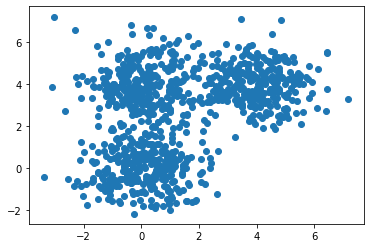

In [6]:
plt.scatter(data[:,0],data[:,1])
plt.show()

In [7]:
R = np.zeros((N_observation,k_cluster))
R

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [8]:
def d(u,v):
    diff = u-v
    return diff.dot(diff)
    
def cost(X,R,M):
    cost = 0 
    for k in range(len(M)):
        for n in range(len(X)):
            cost+= R[n,k] * d(M[k],X[n])
    return cost

def plot_k_means (X , K , max_iter=20,beta = 0.1):
    N,D = X.shape
    # center 
    M= np.zeros((K,D))
    # porbabilty 
    R = np.zeros((N,K))
    
    for k  in range(K):
        M[k] = X[np.random.choice(N)]
    costs = np.zeros(max_iter)
    

    for i in range(max_iter):
        for k in range(K):
            for n in range(N):
                R[n,k] = np.exp(-beta*d(M[k],X[n]))/ np.sum(np.exp(-beta*d(M[k],X[n]))for j in range(K))
        for k in range(K):
            M[k] = R[:,k].dot(X) / R[:,k].sum()

            
        costs[i] = cost(X,R,M)
        if i> 0 :
            if np.abs(costs[i] - costs[i-1] <0.1):
                break
    plt.plot(costs)
    plt.title("costs")
    plt.show()
    
    random_colors = np.random.random((K,3))
    colors = R.dot(random_colors)*20
    print(colors)
    plt.scatter(X[:,0],X[:,1], c=colors)
    

    

/home/ahmed/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.


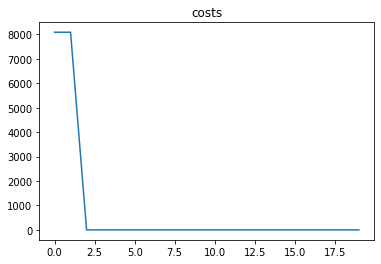

[[ 6.17756131 11.33219021 11.71876995]
 [ 6.17756131 11.33219021 11.71876995]
 [ 6.17756131 11.33219021 11.71876995]
 ...
 [ 6.17756131 11.33219021 11.71876995]
 [ 6.17756131 11.33219021 11.71876995]
 [ 6.17756131 11.33219021 11.71876995]]


ValueError: 'c' argument has 900 elements, which is not acceptable for use with 'x' with size 900, 'y' with size 900.

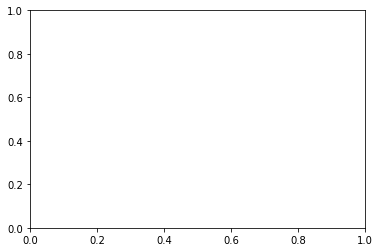

In [9]:
k_cluster = 3 
plot_k_means(data,k_cluster)


/home/ahmed/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.


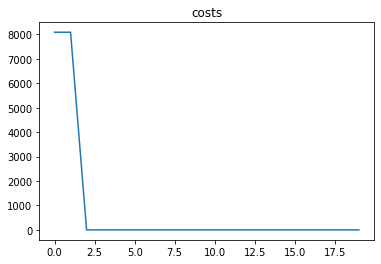

[[ 8.61676678 11.31723039 13.81036457]
 [ 8.61676678 11.31723039 13.81036457]
 [ 8.61676678 11.31723039 13.81036457]
 ...
 [ 8.61676678 11.31723039 13.81036457]
 [ 8.61676678 11.31723039 13.81036457]
 [ 8.61676678 11.31723039 13.81036457]]


ValueError: 'c' argument has 900 elements, which is not acceptable for use with 'x' with size 900, 'y' with size 900.

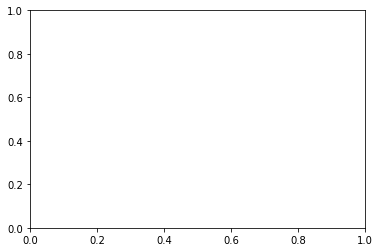

In [10]:
k_cluster = 5
plot_k_means(data,k_cluster,max_iter = 20)